<a href="https://colab.research.google.com/github/lucash3/python_programming/blob/main/BER_of_BPSK_in_AWGN_Channel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tarefa Bissemanal 6**

In [ ]:
import numpy as np 
from math import pi
import matplotlib.pyplot as plt 
import matplotlib
import scipy.signal as signal
import math
from scipy.special import erfc 

 Banco de Funções referente a questão 2

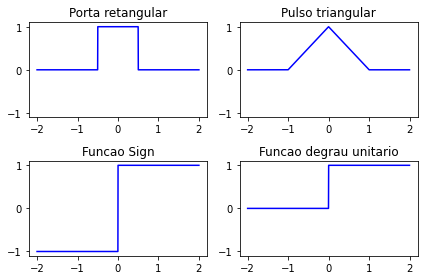

In [ ]:
def p(t):
    """Porta retangular"""
    return 1 * (abs(t) < 0.5)

def pt(t):
    """Pulso triangular"""
    return (1 - abs(t)) * (abs(t) < 1)

def sgn(t):
    """Funcao Sign"""
    return 1 * (t >= 0) - 1 * (t < 0)

def u(t):
    """Funcao degrau unitario"""
    return 1 * (t >= 0)

funcoes = [p, pt, sgn, u]

t = np.linspace(-2, 2, 1000)

plt.figure()
for i, function in enumerate(funcoes, start = 1):
    plt.subplot(2, 2, i)
    plt.plot(t, function(t), '-b')
    plt.ylim((-1.1, 1.1))
    plt.title(function.__doc__)
plt.tight_layout()
plt.show()

Parâmetros de entrada

In [ ]:
size = 100
taxa_amostragem = 0.01
t = np.arange(0, size, taxa_amostragem)


Criação da Bitstream (binária, equiprovável e aleatória)

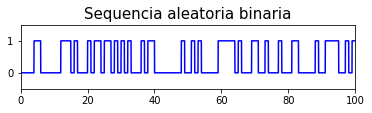

In [ ]:
a = np.random.randint(0, 2, size) 
m = np.zeros(len(t), dtype = np.float32)

for i in range(len(t)):
    m[i] = a[math.floor(t[i])]

fig = plt.figure()
ax1 = fig.add_subplot(3, 1, 1)
ax1.set_title("Sequencia aleatoria binaria", fontsize = 15)
plt.axis([0, size, -0.5, 1.5])
plt.plot(t, m, 'b')     

Criação da sequência de pulsos que representam a bitstream binária



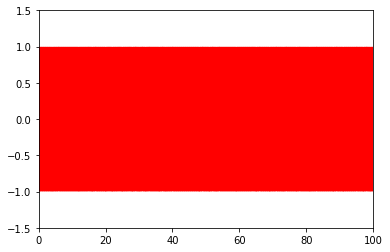

In [ ]:
fc = 4000 
fs = 20*fc   # Frequencia de amostragem  
ts = np.arange(0, (100 * size) / fs, 1 / fs) 
portadora = np.cos(np.dot(2 * pi * fc, ts))
  
modulacao = np.cos(np.dot(2 * pi * fc, ts) + pi * (m - 1) + pi / 4)
  
# Forma de onda modulada 
ax2 = fig.add_subplot(3, 1, 2) 
ax2.set_title('Sinal modulado', fontsize = 15)
plt.axis([0,size,-1.5, 1.5])
plt.plot(t, modulacao, 'r')

Adição do ruído do canal AWGN

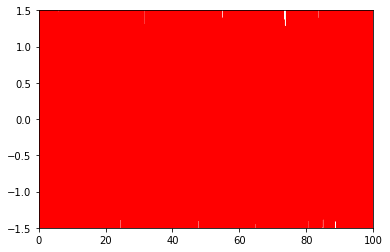

In [ ]:
def awgn(y, snr):
    snr = 10 ** (snr / 10.0) 
    xpower = np.sum(y ** 2) / len(y) 
    npower = xpower / snr
    return np.random.randn(len(y)) * np.sqrt(npower) + y
  
#Ruido 
sinal_contaminado = awgn(modulacao, 0.00001)  # sinal contaminado
 
  
#Sinal modulado sobreposto por ruido  
ax3 = fig.add_subplot(3, 1, 3) 
ax3.set_title('Forma de onda sobreposta pelo ruido', fontsize = 15) 
plt.axis([0, size, -1.5, 1.5]) 
plt.plot(t, sinal_contaminado, 'r')
 

Processos de filtragem e demodulação

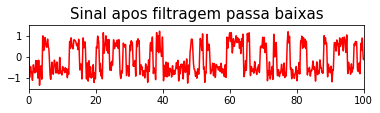

In [ ]:
# Banda passante [2000,6000] 
[b11,a11] = signal.ellip(5, 0.5, 60, [2000*2/80000, 6000*2/80000], btype = 'bandpass', analog = False, output = 'ba')
 
 
# Projeto de filtro passa-baixos, frequência de corte de banda passante: 2000 Hz
[b12,a12] = signal.ellip(5, 0.5, 60, (2000 * 2 / 80000), btype = 'lowpass', analog = False, output = 'ba')
 
 
# Filtragem do ruido: filtro passa banda 
saida_bandapassante = signal.filtfilt(b11, a11, sinal_contaminado)
 
 
# Demodulacao multiplicacao por portadora em fase 
demodulacao = saida_bandapassante * (portadora * 2)
 

# Filtro passa baixa 
saida_passabaixas = signal.filtfilt(b12, a12, demodulacao)
fig2 = plt.figure()
bx1 = fig2.add_subplot(3, 1, 1) 
bx1.set_title('Sinal apos filtragem passa baixas', fontsize = 15)
plt.axis([0, size, -1.5, 1.5]) 
plt.plot(t, saida_passabaixas, 'r')


Processo de decisão 

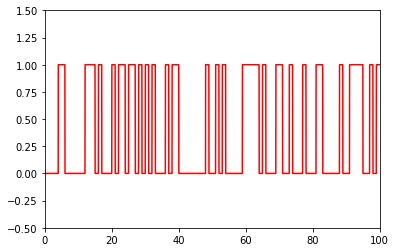

In [ ]:
decisao = np.zeros(len(t), dtype=np.float32)
flag = np.zeros(size, dtype=np.float32)
 
  
for i in range(100):
 tempF = 0
 
 for j in range(100):
     tempF = tempF + saida_passabaixas[i * 100 + j]
     
 if tempF > 0:
     flag[i] = 1
 else:
     flag[i] = 0
 
    
for i in range(size):
 if flag[i] == 0:
     for j in range(100):
         decisao[i * 100 + j] = 0
 else:
     for j in range(100):
         decisao[i * 100 + j] = 1
 
 

bx2 = fig2.add_subplot(3, 1, 2)
bx2.set_title('Sinal apos processo de decisao', fontsize = 15)
plt.axis([0, size, -0.5, 1.5])
plt.plot(t, decisao, 'r')
plt.show()

Partindo da construção para o caso BPSK com número de simbolos M igual a 2 reavaliamos a construção para o calculo da probabilidade de erro


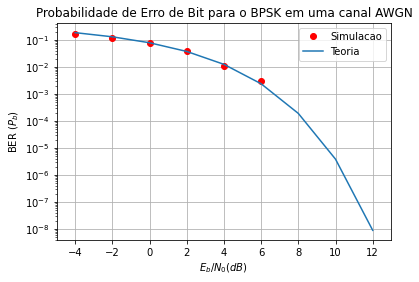

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1])

In [ ]:
n_simbolos = 10**3                                  # Numero de simbolos a serem transmitidos 
EbN0dBs = np.arange(start=-4,stop = 13, step = 2)   # relacao Eb/N0 em dB 
BER_simulada = np.zeros(len(EbN0dBs))               # Taxa de erro de bit da simulacao 

EbN0dBs

M = 2                                   # Numero de pontos da constelacao 
m = np.arange(0,M)                      # Simbolos possiveis (todas as entradas)
A = 1;                                  # Amplitude
constelacao = A*np.cos(m/M*2*np.pi)     # Constelacao de referencia, Fiz com M = 2 --> BPSK


#----------------------------------#
#   Transmissao via canal AWGNW    #
#----------------------------------#
simbolos_entrada = np.random.randint(low = 0, high = M, size = n_simbolos)  #sequencia de 0s e 1s aleatorios como entrada do modulador
s = constelacao[simbolos_entrada]   #simbolos modulados 

#fig, ax1 = plt.subplots(nrows = 1, ncols = 1)
#ax1.plot(np.real(constelacao), np.imag(constelacao),'*')    # plota a constelacao demarcando os pontos com asterisco 



#----------------------------------#
#   Modelagem do canal             #
#----------------------------------#
# Calculo da potencia dos simbolos modulados e adicao de ruido AWG 

for j,EbN0dB in enumerate(EbN0dBs):
    gamma = 10**(EbN0dB/10)                              # Relacao SNR em escala linear 
    P = sum(abs(s)**2)/len(s)                            # Potencia do vetor (real)
    N0 = P/gamma                                         # Densidade espectral de potencia do ruido 
    n = np.sqrt(N0/2)*np.random.standard_normal(s.shape) # vetor ruido 
    r = s + n                                            # sinal recebido = simbolos + ruido 

#------------------------------------------------------#
#   Modelagem do Receptor: Detector de correlacao      #
#------------------------------------------------------#
    simbolos_detectados = (r <= 0).astype(int)                                      # limiar em 0
    BER_simulada[j] = np.sum(simbolos_detectados != simbolos_entrada)/n_simbolos    # calculo da BER   
    BER_simulada[j]

BER_teorica = 0.5*erfc(np.sqrt(10**(EbN0dBs/10)))

fig, ax = plt.subplots(nrows = 1, ncols = 1)
ax.semilogy(EbN0dBs,BER_simulada, color='r',marker='o',linestyle='',label='Simulacao')
ax.semilogy(EbN0dBs,BER_teorica, marker='',linestyle='-',label='Teoria')
ax.set_xlabel('$E_b/N_0(dB)$');ax.set_ylabel('BER ($P_b$)')
ax.set_title('Probabilidade de Erro de Bit para o BPSK em uma canal AWGN')      # Usei M=2, portanto BPSK
ax.set_xlim(-5,13);ax.grid(True);
ax.legend();
plt.show()

bitstream = a
bitstream


In [ ]:
bitstream_recebida

array([0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1.],
      dtype=float32)